<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-School-Core-Week-4-IP/blob/main/Moringa_School_Core_2022_03_Deborah_Masibo_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Electric Car-Sharing Service Company

## 1. Imports

In [419]:
import pandas as pd
import  numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os
import math

%matplotlib inline
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [236]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/MyDrive/Core/Moringa Core Week 4 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Main Dataset**

In [237]:
# Loading dataset from Google Drive
autolib_population = pd.read_csv('autolib_daily_events_postal_code.csv')

**Description**

In [238]:
# Loading description from Google Drive
desc = pd.read_excel('columns_explanation.xlsx')

### Dataset Preview

**Main Dataset**

In [391]:
# Information
autolib_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
 13  Department              16085 non-null  object
dtypes: int64(11), object(3)
memory usage: 1.7+ MB


In [239]:
autolib_population.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [240]:
autolib_population.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


**Description**

In [241]:
desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [242]:
# Clustering postal codes to the French departments they belong to.
autolib_population.loc[(autolib_population['Postal code'] >= 75001) & (autolib_population['Postal code'] <= 75116), ['Department']]= 'Paris'
autolib_population.loc[(autolib_population['Postal code'] >= 77000) & (autolib_population['Postal code'] <= 77990), ['Department']]= 'Seine-et-Marne'
autolib_population.loc[(autolib_population['Postal code'] >= 78000) & (autolib_population['Postal code'] <= 78990), ['Department']]= 'Yvelines'
autolib_population.loc[(autolib_population['Postal code'] >= 91330) & (autolib_population['Postal code'] <= 91940), ['Department']]= 'Essonne'
autolib_population.loc[autolib_population['Postal code'] == 94390, ['Department']]= 'Essonne'
autolib_population.loc[(autolib_population['Postal code'] >= 92000) & (autolib_population['Postal code'] <= 92800), ['Department']]= 'Hauts-de-Seine'
autolib_population.loc[(autolib_population['Postal code'] >= 93000) & (autolib_population['Postal code'] <= 93800), ['Department']]= 'Seine-Saint-Denis'
autolib_population.loc[(autolib_population['Postal code'] >= 94000) & (autolib_population['Postal code'] <= 94880), ['Department']]= 'Val-de-Marne'
autolib_population.loc[(autolib_population['Postal code'] >= 95000) & (autolib_population['Postal code'] <= 95880), ['Department']]= 'Val-d\'Oise'


In [243]:
# Confirming changes
autolib_population['Department'].head()

0    Paris
1    Paris
2    Paris
3    Paris
4    Paris
Name: Department, dtype: object

In [244]:
# Tail Section
autolib_population['Department'].tail()

16080    Val-d'Oise
16081    Val-d'Oise
16082    Val-d'Oise
16083    Val-d'Oise
16084    Val-d'Oise
Name: Department, dtype: object

### Cluster Sampling

In [245]:
# Department Frequency table
autolib_population['Department'].value_counts()

Hauts-de-Seine       5601
Paris                3431
Seine-Saint-Denis    3000
Val-de-Marne         2650
Yvelines              468
Val-d'Oise            468
Essonne               467
Name: Department, dtype: int64

In [246]:
# Cluster sampling frame
dep = pd.DataFrame(autolib_population['Department'].unique())


In [247]:
# Cluster sampling

# Get the same sample each time
np.random.seed(0)
# Random clusters
clusters = np.random.choice(np.arange(6), size=3, replace=False, )
clusters

array([5, 2, 1])

In [251]:
# Selecting the chosen clusters
cluster_list = dep.iloc[clusters]
cluster_list = list(cluster_list[0])
autolib = autolib_population[autolib_population['Department'].isin(cluster_list)]

In [253]:
# Reseting the indexing of the sample
autolib.reset_index(drop = True, inplace = True)

In [254]:
# Confirming changes
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Department
0,78000,1/1/2018,1440,0,weekday,71,56,2,2,4,4,0,0,Yvelines
1,78000,1/2/2018,1438,1,weekday,24,21,2,2,1,0,0,0,Yvelines
2,78000,1/3/2018,1439,2,weekday,43,49,0,0,1,3,0,0,Yvelines
3,78000,1/4/2018,1320,3,weekday,31,41,0,0,4,3,0,0,Yvelines
4,78000,1/5/2018,1440,4,weekday,35,35,1,1,5,4,0,0,Yvelines


In [257]:
# Autolib frequency table
autolib['Department'].value_counts()

Val-de-Marne    2650
Yvelines         468
Essonne          467
Name: Department, dtype: int64

## 3. Data Understanding

In [258]:
# Dataset records and columns
print(f'The dataset contains {autolib.shape[0]} records and {autolib.shape[1]} columns.')

The dataset contains 3585 records and 14 columns.


In [259]:
# Dataset information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             3585 non-null   int64 
 1   date                    3585 non-null   object
 2   n_daily_data_points     3585 non-null   int64 
 3   dayOfWeek               3585 non-null   int64 
 4   day_type                3585 non-null   object
 5   BlueCars_taken_sum      3585 non-null   int64 
 6   BlueCars_returned_sum   3585 non-null   int64 
 7   Utilib_taken_sum        3585 non-null   int64 
 8   Utilib_returned_sum     3585 non-null   int64 
 9   Utilib_14_taken_sum     3585 non-null   int64 
 10  Utilib_14_returned_sum  3585 non-null   int64 
 11  Slots_freed_sum         3585 non-null   int64 
 12  Slots_taken_sum         3585 non-null   int64 
 13  Department              3585 non-null   object
dtypes: int64(11), object(3)
memory usage: 392.2+ KB


From the information, it can be seen that there are:
* no missing values,
* data types need to be rectified, and
* column names need to be adjusted.

In [260]:
# Dataset description
autolib.describe(include = 'all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Department
count,3585.000000,3585,3585.000000,3585.000000,3585,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,1/1/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Val-de-Marne
freq,NaN,23,NaN,NaN,2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2650
mean,91792.214784,NaN,1431.339749,2.969596,NaN,38.477266,38.453835,1.189958,1.192190,2.836541,2.836262,0.328033,0.327476,NaN
std,5399.009257,NaN,33.174854,2.008053,NaN,26.572994,26.090805,1.584280,1.570744,2.942350,2.925836,1.193153,1.186741,NaN
min,78000.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,91400.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN
50%,94140.000000,NaN,1440.000000,3.000000,NaN,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN
75%,94340.000000,NaN,1440.000000,5.000000,NaN,51.000000,51.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,NaN


## 4. Data Preperation

### a) Validity

### b) Accuracy

In [261]:
# Columns
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum', 'Department'],
      dtype='object')

In [262]:
# Checking the unique day_type column values
autolib.day_type.unique()

array(['weekday', 'weekend'], dtype=object)

In [263]:
# Checking the dayOfWeek and day_type columns accuracy

weekdays = list(range(5))
weekend = [5,6]

# Checking weekends
# print('Saturday has ', autolib[(autolib.dayOfWeek == 5) & (autolib.day_type != 'weekend')].shape[0], 'wrong records')
# print('Sunday', autolib[(autolib.dayOfWeek == 6) & (autolib.day_type != 'weekend')].shape[0], 'wrong records')

def weekday(list1, list2):
  for value1 in list1:
    print('Day ', value1, 'has ', autolib[(autolib.dayOfWeek == value1) & (autolib.day_type != 'weekday')].shape[0], ' wrong records.')
  for value2 in list2:
    print('Day ', value2, 'has ', autolib[(autolib.dayOfWeek == value2) & (autolib.day_type != 'weekend')].shape[0], ' wrong records.')

weekday(weekdays, weekend)

Day  0 has  0  wrong records.
Day  1 has  0  wrong records.
Day  2 has  0  wrong records.
Day  3 has  0  wrong records.
Day  4 has  0  wrong records.
Day  5 has  0  wrong records.
Day  6 has  0  wrong records.


All records are correct.

### c) Completeness

In [264]:
# Checking for missing values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
Department                0
dtype: int64

There are no missing values.

### d) Consistency

In [265]:
# Checking for duplicates
autolib.duplicated().any().any()

False

There are no duplicates.

###e) Uniformity

#### i) Renaming Columns

The columns names will be edited for ease of reference, use and uniformity. However, the column names will be retained.

In [266]:
# Dataset columns
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum', 'Department'],
      dtype='object')

In [267]:
# Function used to change the columnn names to lower case and make their format uniform.
def RenameColumns(data):
    new_columns = []
    columns = list(data.columns.values)
    for name in columns:
        new_columns.append(name.lower().replace(' ','_'))
    data.columns = new_columns

RenameColumns(autolib)

In [268]:
# Confirming changes.
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'department'],
      dtype='object')

#### ii) Data Type Conversion

In [269]:
# Checking dataset column data types.
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             3585 non-null   int64 
 1   date                    3585 non-null   object
 2   n_daily_data_points     3585 non-null   int64 
 3   dayofweek               3585 non-null   int64 
 4   day_type                3585 non-null   object
 5   bluecars_taken_sum      3585 non-null   int64 
 6   bluecars_returned_sum   3585 non-null   int64 
 7   utilib_taken_sum        3585 non-null   int64 
 8   utilib_returned_sum     3585 non-null   int64 
 9   utilib_14_taken_sum     3585 non-null   int64 
 10  utilib_14_returned_sum  3585 non-null   int64 
 11  slots_freed_sum         3585 non-null   int64 
 12  slots_taken_sum         3585 non-null   int64 
 13  department              3585 non-null   object
dtypes: int64(11), object(3)
memory usage: 392.2+ KB


In [270]:
# Checking the date column
autolib.date.unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [271]:
# Changing the date column data type.
autolib['date'] = pd.to_datetime(autolib['date'], format='%m/%d/%Y')

# Checking changes
autolib.date.dtypes

dtype('<M8[ns]')

In [272]:
# Confirming changes
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             3585 non-null   int64         
 1   date                    3585 non-null   datetime64[ns]
 2   n_daily_data_points     3585 non-null   int64         
 3   dayofweek               3585 non-null   int64         
 4   day_type                3585 non-null   object        
 5   bluecars_taken_sum      3585 non-null   int64         
 6   bluecars_returned_sum   3585 non-null   int64         
 7   utilib_taken_sum        3585 non-null   int64         
 8   utilib_returned_sum     3585 non-null   int64         
 9   utilib_14_taken_sum     3585 non-null   int64         
 10  utilib_14_returned_sum  3585 non-null   int64         
 11  slots_freed_sum         3585 non-null   int64         
 12  slots_taken_sum         3585 non-null   int64   

#### f) Outliers

In [273]:
# Numerical columns
numerical = list(autolib.select_dtypes(include = 'int64').columns)

The postal_code and day_of_week are categorical columns. Therefore, they will be excluded.

In [274]:
# Removing specified column names.
numerical.remove('postal_code')
numerical.remove('dayofweek')

In [275]:
# Confirming changes
numerical

['n_daily_data_points',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [276]:
# Numerical sub-dataset
numerical_data = autolib.loc[:, numerical]

# Checking for outliers using IQR
# 1st and 2nd Quartiles, and IQR  of each numerical column.
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_daily_data_points        1.0
bluecars_taken_sum        31.0
bluecars_returned_sum     31.0
utilib_taken_sum           2.0
utilib_returned_sum        2.0
utilib_14_taken_sum        3.0
utilib_14_returned_sum     3.0
slots_freed_sum            0.0
slots_taken_sum            0.0
dtype: float64


In [277]:
# Checking for outliers
(numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3580,False,False,False,False,False,True,True,False,False
3581,False,True,True,False,False,True,True,False,False
3582,False,True,True,False,False,True,True,False,False
3583,False,False,False,False,False,False,False,False,False


The data contains outliers.

The analysis will be restricted to general events, therefore, outliers will be improved. This will limit skew and allow for the use of statitistical tests that are based on a normal distribution.

In [278]:
# Dataset with no outliers
numerical_no_outliers = numerical_data[~(( numerical_data < (Q1 - 1.5 * IQR)) |( numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [279]:
# Number of outliers removed
outliers = numerical_data.shape[0] - numerical_no_outliers.shape[0]
print(f'Number of outliers removed: {outliers}')

# Percentage to the total number of records.
print(f'Percentage: {(outliers/numerical_data.shape[0])*100} %')

Number of outliers removed: 1218
Percentage: 33.97489539748954 %


In [280]:
numerical_no_outliers.index

Int64Index([   0,    1,    2,    4,    7,    8,    9,   10,   11,   13,
            ...
            3563, 3566, 3569, 3570, 3571, 3572, 3577, 3578, 3579, 3583],
           dtype='int64', length=2367)

In [281]:
# Dataset without outliers
autolib_no_outliers = autolib.iloc[numerical_no_outliers.index]

In [282]:
# Confirming that no unnecessary changes have been made to the dataset sttructure.
autolib_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 3583
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             2367 non-null   int64         
 1   date                    2367 non-null   datetime64[ns]
 2   n_daily_data_points     2367 non-null   int64         
 3   dayofweek               2367 non-null   int64         
 4   day_type                2367 non-null   object        
 5   bluecars_taken_sum      2367 non-null   int64         
 6   bluecars_returned_sum   2367 non-null   int64         
 7   utilib_taken_sum        2367 non-null   int64         
 8   utilib_returned_sum     2367 non-null   int64         
 9   utilib_14_taken_sum     2367 non-null   int64         
 10  utilib_14_returned_sum  2367 non-null   int64         
 11  slots_freed_sum         2367 non-null   int64         
 12  slots_taken_sum         2367 non-null   int64   

## 5. Descriptive Analysis

### a) Univariate Analysis

In [283]:
# Catgorizing columns
nominal = ['postal_code', 'day_type']
ordinal = ['dayofweek']
interval = ['date']
interval.extend(numerical)


#### i) Categorical Column

In [284]:
# Checking the postal code colum
autolib.postal_code.unique()

array([78000, 78140, 78150, 91330, 91370, 91400, 94000, 94100, 94110,
       94120, 94130, 94140, 94150, 94160, 94220, 94230, 94300, 94340,
       94410, 94450, 94500, 94700, 94800])

Too many values to plot.

In [285]:
# Frequency table
autolib.postal_code.value_counts()

78000    156
78140    156
94700    156
94500    156
94450    156
94340    156
94300    156
94230    156
94220    156
94160    156
94150    156
94140    156
94130    156
94120    156
94110    156
94000    156
91370    156
91330    156
78150    156
94800    156
94100    155
91400    155
94410    155
Name: postal_code, dtype: int64

Most postal code records have about 150 records. 93390 has the least records.

In [286]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(data[column], palette = 'flare', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)

  plt.show()


In [287]:
# Target columns
columns = nominal.copy()
columns.extend(ordinal)
columns.remove('postal_code')

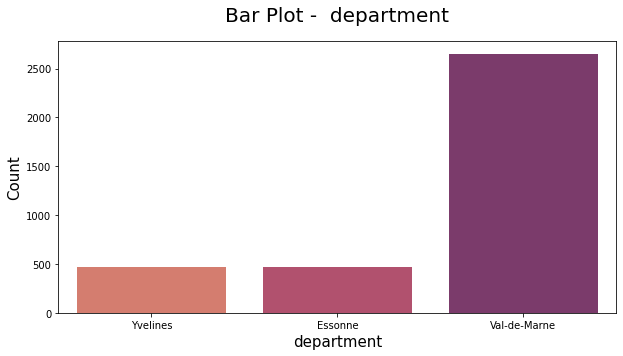

In [394]:
# Department
CatPlots('department', autolib)

Val-de-Marne has the highest frequency.

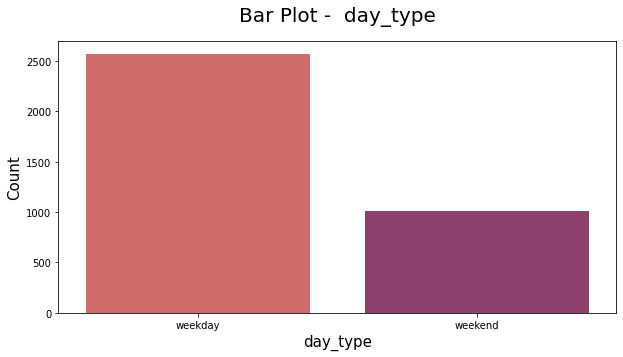

In [392]:
# Day Type
CatPlots(columns[0], autolib)

Most records were made on weekdays. This could be due to the fact that there are more week days.

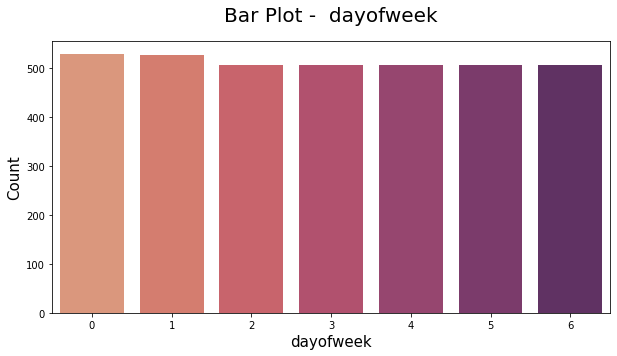

In [393]:
# Day Type
CatPlots(columns[1], autolib)

Sunday has the highest frequency, followed by Monday and Tuesday.

In [290]:
# Checking the date column
autolib_no_outliers.date.unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-08T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-10T00:00:00.000000000', '2018-01-11T00:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-27T00:00:00.000000000',
       '2018-01-28T00:00:00.000000000', '2018-01-29T00:00:00.000000000',
       '2018-01-30T00:00:00.000000000', '2018-01-31T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-02-02T00:00:00.000000000',
       '2018-02-03T00:00:00.000000000', '2018-02-04

The data was collecetd in 2018.

In [291]:
autolib_no_outliers.date.dt.month.unique()

array([1, 2, 3, 4, 5, 6])

In [292]:
# Plotting the month frequency
months = autolib_no_outliers.date.dt.month


The data was taken during the first half of 2018.

In [293]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'department'],
      dtype='object')

In [294]:
def BoxPlot(columns, data):
  fig, ax = plt.subplots(len(columns))
  for i, column in enumerate(columns):
    sns.boxplot(data[column], ax = ax[i], cmap = 'flare')
  plt.show()

In [295]:
months

0       1
1       1
2       1
4       1
7       1
       ..
3572    6
3577    6
3578    6
3579    6
3583    6
Name: date, Length: 2367, dtype: int64

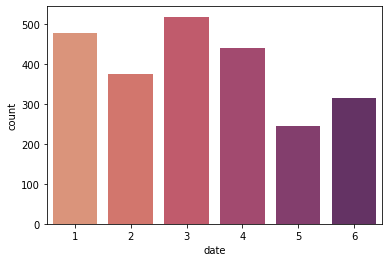

In [296]:
sns.countplot(months, palette = 'flare')

March, January and April had the highest frequency.

#### ii) Interval and Ratio Columns

In [297]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [298]:
# Plotting function
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sns.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data1[column], ax = ax[0,1], color = 'purple')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sns.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data2[column], ax = ax[1,1], color = 'purple')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

**1. Daily Data Points**

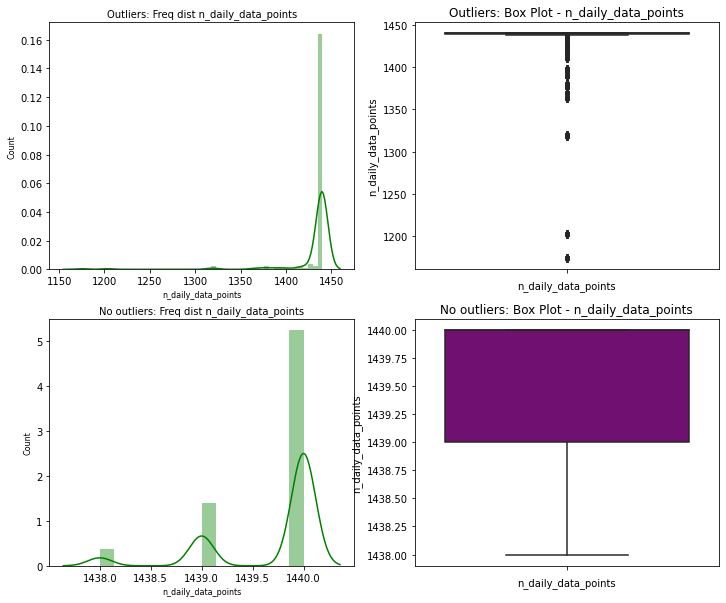

In [299]:
# Daily data points column
NumericalPlots(numerical[0], autolib, autolib_no_outliers)

In [300]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[0]].unique())}')
autolib[numerical[0]].unique()

Length = 23


array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

* Of the 10,000 records, there are 23 unique values for thedaily data points column. 1440 has the highest count, followed by 1439 and 1438. 
* As there are only 23 unique values. The outliers will be retained.
* The data is negatively skewed.

**2. Sum of BlueCars taken.**

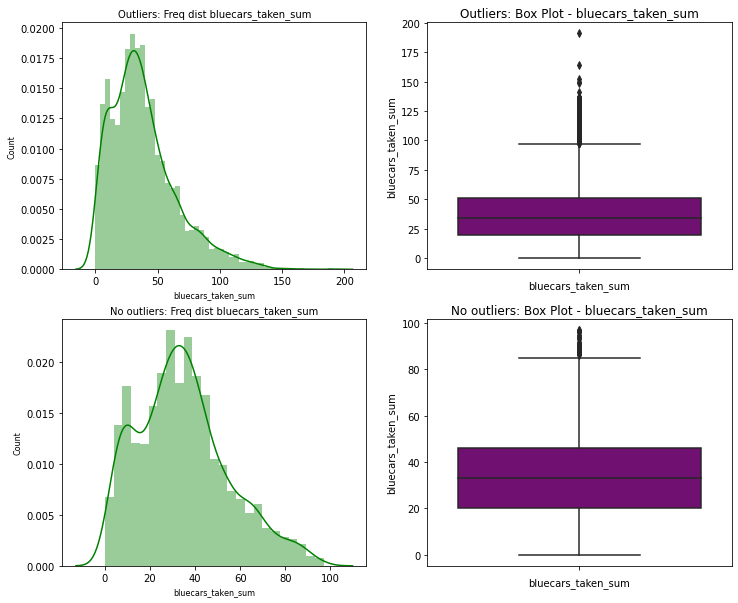

In [301]:
# Bluecars Taken
NumericalPlots(numerical[1], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-50 of the sum had the highest count.
* Removing outliers reduces the skew.


In [302]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[1]].unique())}')

Length = 142


**3. Sum of Bluecars returned.**

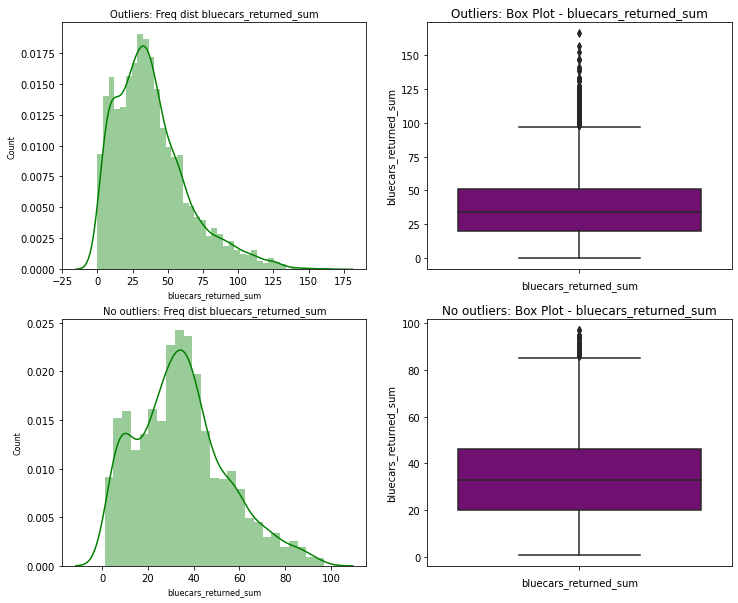

In [303]:
# Bluecars Returned
NumericalPlots(numerical[2], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-50 of the sum had the highest count.
* Removing outliers reduces the skew.

In [304]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[2]].unique())}')

Length = 139


**4. Sum of Utilib cars taken**

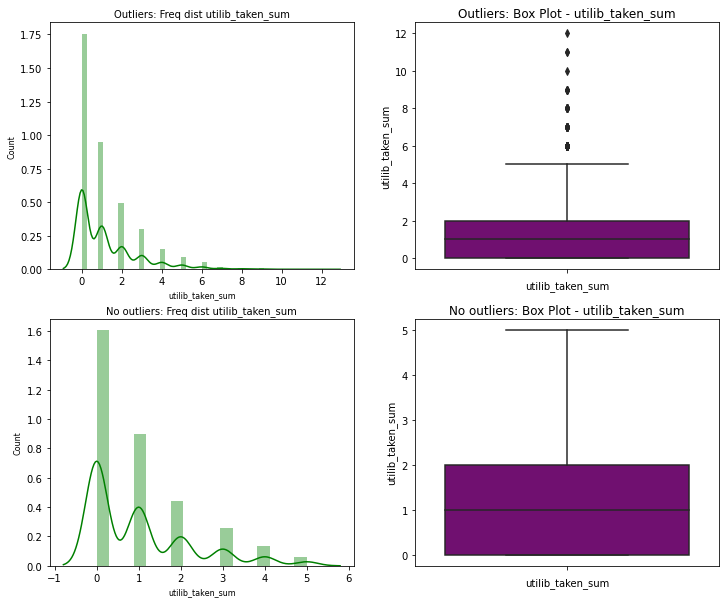

In [305]:
# Utilib cars taken
NumericalPlots(numerical[3], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-2 of the sum had the highest count.
* Removing outliers reduces the skew.

In [306]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[3]].unique())}')

Length = 13


**5. Sum of Utilib cars returned**

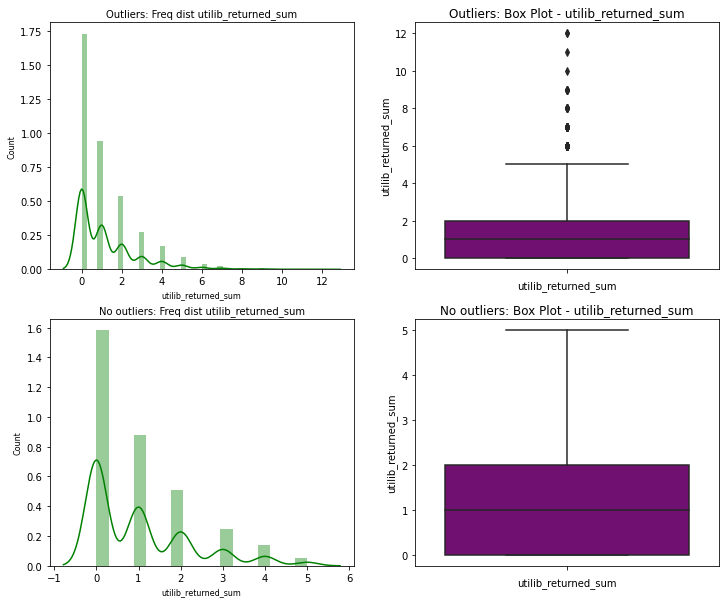

In [307]:
# Utilib cars returned.
NumericalPlots(numerical[4], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-2 of the sum had the highest count.
* Removing outliers reduces the skew.

In [308]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[4]].unique())}')

Length = 13


**6. Sum of Utilib-14 cars taken**

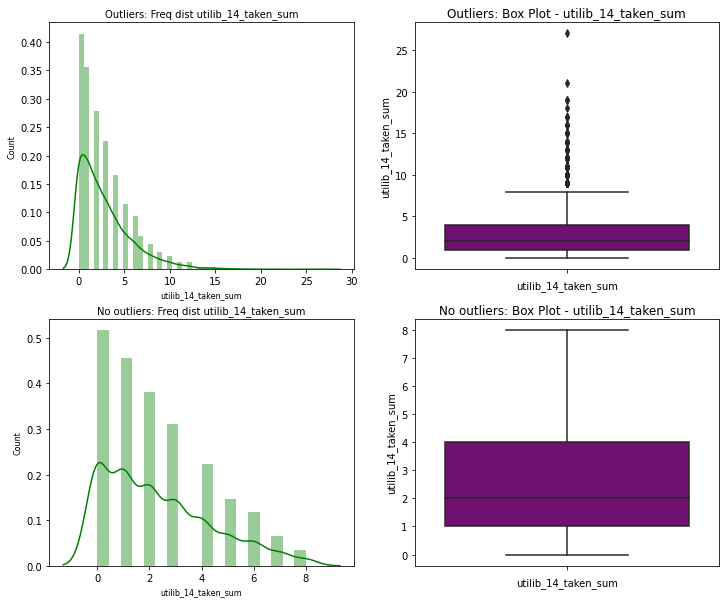

In [309]:
# Utilib-14 cars taken.
NumericalPlots(numerical[5], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-5 of the sum had the highest count.
* Removing outliers reduces the skew.

In [310]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[5]].unique())}')

Length = 22


**7. Sum of Utilib-14 cars returned**

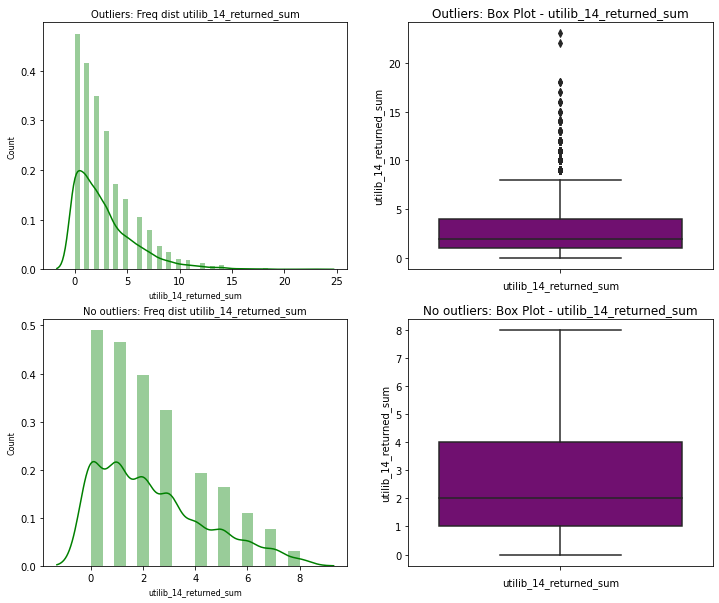

In [311]:
# Utilib-14 cars returned.
NumericalPlots(numerical[6], autolib, autolib_no_outliers)

* The data is positively skewed.
* The range from 0-5 of the sum had the highest count.
* Removing outliers reduces the skew.

In [312]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[6]].unique())}')

Length = 21


**8. Sum of Slots Freed**

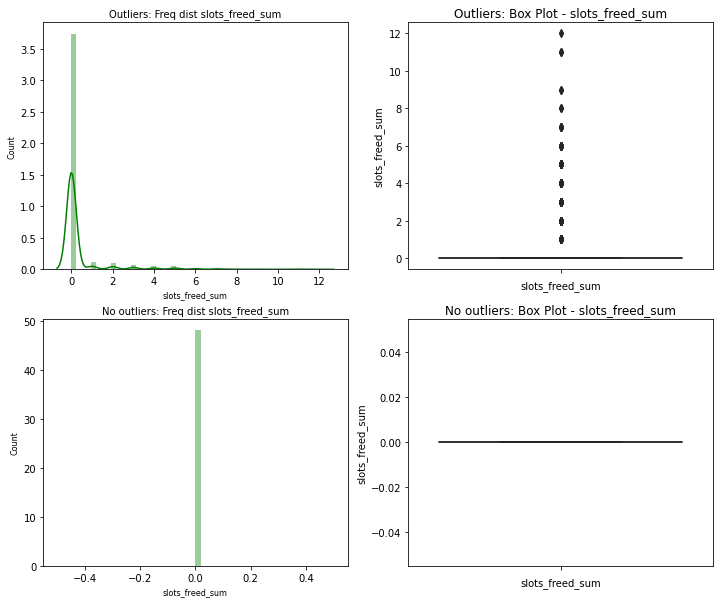

In [313]:
# Slots freed.
NumericalPlots(numerical[7], autolib, autolib_no_outliers)

* The sum of zero had the highest count in the distribution.

In [314]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[7]].unique())}')

Length = 12


**9. Sum of Slots Taken**

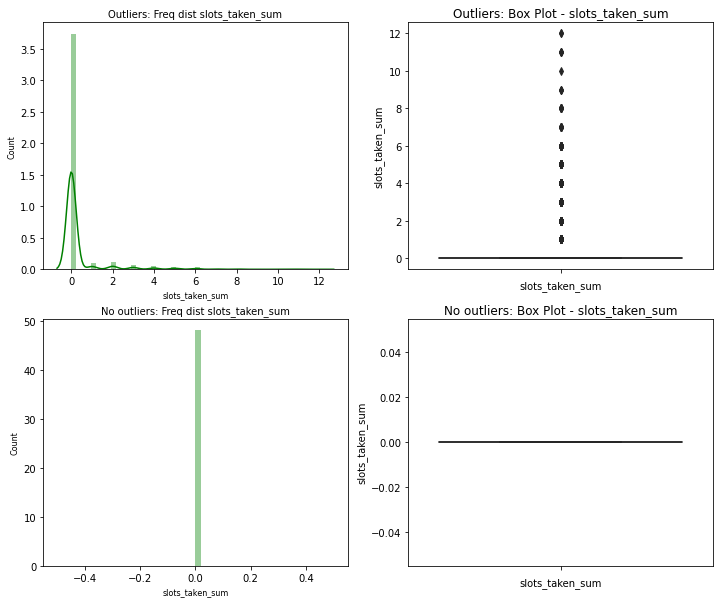

In [315]:
# Slots taken.
NumericalPlots(numerical[8], autolib, autolib_no_outliers)

* The sum of zero had the highest count in the distribution.

In [316]:
# Checking the unique values
print(f'Length = {len(autolib[numerical[8]].unique())}')

Length = 13


From the analysis above, unique values in the numerical values form at most 2% of the 10,000 records. Therefore, outliers will be retained.

**Measures of Central Tendency**

In [317]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [318]:
# Mean
MeasureCentral('mean', numerical, autolib)

n_daily_data_points column mean = 1431.339748953975
bluecars_taken_sum column mean = 38.47726638772664
bluecars_returned_sum column mean = 38.453835425383545
utilib_taken_sum column mean = 1.189958158995816
utilib_returned_sum column mean = 1.192189679218968
utilib_14_taken_sum column mean = 2.8365411436541144
utilib_14_returned_sum column mean = 2.8362622036262204
slots_freed_sum column mean = 0.32803347280334727
slots_taken_sum column mean = 0.3274755927475593


In [319]:
# Median
MeasureCentral('median', numerical, autolib)

n_daily_data_points column median = 1440.0
bluecars_taken_sum column median = 34.0
bluecars_returned_sum column median = 34.0
utilib_taken_sum column median = 1.0
utilib_returned_sum column median = 1.0
utilib_14_taken_sum column median = 2.0
utilib_14_returned_sum column median = 2.0
slots_freed_sum column median = 0.0
slots_taken_sum column median = 0.0


The mean is greater than the mode, confirming the positive skew.

In [320]:
# Mode
MeasureCentral('mode', numerical, autolib)

n_daily_data_points column mode = 0    1440
dtype: int64
bluecars_taken_sum column mode = 0    26
dtype: int64
bluecars_returned_sum column mode = 0    34
dtype: int64
utilib_taken_sum column mode = 0    0
dtype: int64
utilib_returned_sum column mode = 0    0
dtype: int64
utilib_14_taken_sum column mode = 0    0
dtype: int64
utilib_14_returned_sum column mode = 0    0
dtype: int64
slots_freed_sum column mode = 0    0
dtype: int64
slots_taken_sum column mode = 0    0
dtype: int64


Most numerical columns have a mode of zero. This indicates a lack of customers, or, missing records were filled with zero.

**Measures of Distribution**

In [321]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [322]:
# Range
MeasureDistribution('range', numerical, autolib)

n_daily_data_points column range = 266
bluecars_taken_sum column range = 191
bluecars_returned_sum column range = 166
utilib_taken_sum column range = 12
utilib_returned_sum column range = 12
utilib_14_taken_sum column range = 27
utilib_14_returned_sum column range = 23
slots_freed_sum column range = 12
slots_taken_sum column range = 12


* Bluecars have the largest range. This indicates that they were the most popular cars with customers.
* The Utilib car records have the smallest range. This indicates a lack of popularity with customers.
* Therefore, Utilib-14 cars have average popularity.

In [323]:
# IQR
MeasureDistribution('IQR', numerical, autolib)

n_daily_data_points column IQR = 1.0
bluecars_taken_sum column IQR = 31.0
bluecars_returned_sum column IQR = 31.0
utilib_taken_sum column IQR = 2.0
utilib_returned_sum column IQR = 2.0
utilib_14_taken_sum column IQR = 3.0
utilib_14_returned_sum column IQR = 3.0
slots_freed_sum column IQR = 0.0
slots_taken_sum column IQR = 0.0


* Bluecars have the widest IQR, while Utilib cars have the lowest. This could be due to differences in popularity.

In [324]:
# Variance
MeasureDistribution('var', numerical, autolib)

n_daily_data_points column variance = 1100.5709223700424
bluecars_taken_sum column variance = 706.1239947574205
bluecars_returned_sum column variance = 680.7300808490265
utilib_taken_sum column variance = 2.5099437761505703
utilib_returned_sum column variance = 2.4672380890117185
utilib_14_taken_sum column variance = 8.657425532974584
utilib_14_returned_sum column variance = 8.560515042837094
slots_freed_sum column variance = 1.423614016736511
slots_taken_sum column variance = 1.4083548142061093


Most columns have a very large spread of data points, apart from Utilib-14 and Utilib car columns.

In [325]:
# Standard deviation
MeasureDistribution('std', numerical, autolib)

n_daily_data_points column std = 33.17485376561655
bluecars_taken_sum column std = 26.57299371086029
bluecars_returned_sum column std = 26.090804526672354
utilib_taken_sum column std = 1.5842802075865778
utilib_returned_sum column std = 1.5707444378420439
utilib_14_taken_sum column std = 2.9423503416443433
utilib_14_returned_sum column std = 2.9258357853504173
slots_freed_sum column std = 1.1931529728984926
slots_taken_sum column std = 1.186741258323022


* The standard deviation provides a clearer demonstration of the spread. However, the previous observations remain the same.
* High spread could indicate varying performance of the car-sharing service. 

In [326]:
# Skewness
MeasureDistribution('skew', numerical, autolib)

n_daily_data_points column skew = -5.7473767435020795
bluecars_taken_sum column skew = 1.111121449687443
bluecars_returned_sum column skew = 1.1047300509068634
utilib_taken_sum column skew = 1.8559864161313016
utilib_returned_sum column skew = 1.8783878592751742
utilib_14_taken_sum column skew = 1.668313483878549
utilib_14_returned_sum column skew = 1.6367839589069857
slots_freed_sum column skew = 4.736472508451031
slots_taken_sum column skew = 4.742654129540509


All numerical columns are positively skewed, apart from the data points column, which has a negative skew.

In [327]:
# Checking skew after removal of outliers.
MeasureDistribution('skew', numerical, autolib_no_outliers)

n_daily_data_points column skew = -1.6962454618977796
bluecars_taken_sum column skew = 0.5583602714119469
bluecars_returned_sum column skew = 0.5399292738378512
utilib_taken_sum column skew = 1.2860564845882143
utilib_returned_sum column skew = 1.230157937030822
utilib_14_taken_sum column skew = 0.7842535678254489
utilib_14_returned_sum column skew = 0.7853488921485667
slots_freed_sum column skew = 0
slots_taken_sum column skew = 0


This confirms that the columns do not attain a normal distribution even after outliers are removed. Therefore, they will be retained as they seem significant to the analysis.

In [328]:
# Kurtosis
MeasureDistribution('kurt', numerical, autolib)

n_daily_data_points column kurt = 36.68464156897949
bluecars_taken_sum column kurt = 1.4666438603640728
bluecars_returned_sum column kurt = 1.3761911194585998
utilib_taken_sum column kurt = 4.348864159184435
utilib_returned_sum column kurt = 4.677141672050973
utilib_14_taken_sum column kurt = 4.18862956970922
utilib_14_returned_sum column kurt = 3.6612580496157525
slots_freed_sum column kurt = 26.707197584246973
slots_taken_sum column kurt = 26.776167353358055


All numerical columns are leptokurtic.

### b) Bivariate Analysis

#### i) Categorical-Categorical Analysis

In [399]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5))
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

In [330]:
# Nominal columns
nominal

['postal_code', 'day_type']

In [331]:
# Ordinal column
ordinal

['dayofweek']

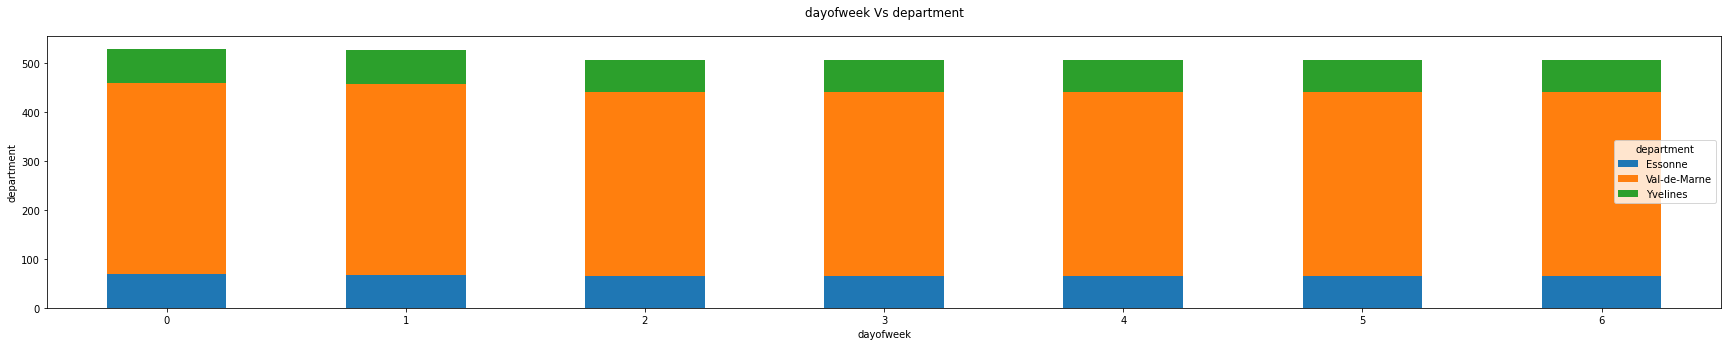

In [400]:
CrosstabPlot('dayofweek', 'department', autolib)

Val-de-Marne had the highest frequency for all days of the week.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

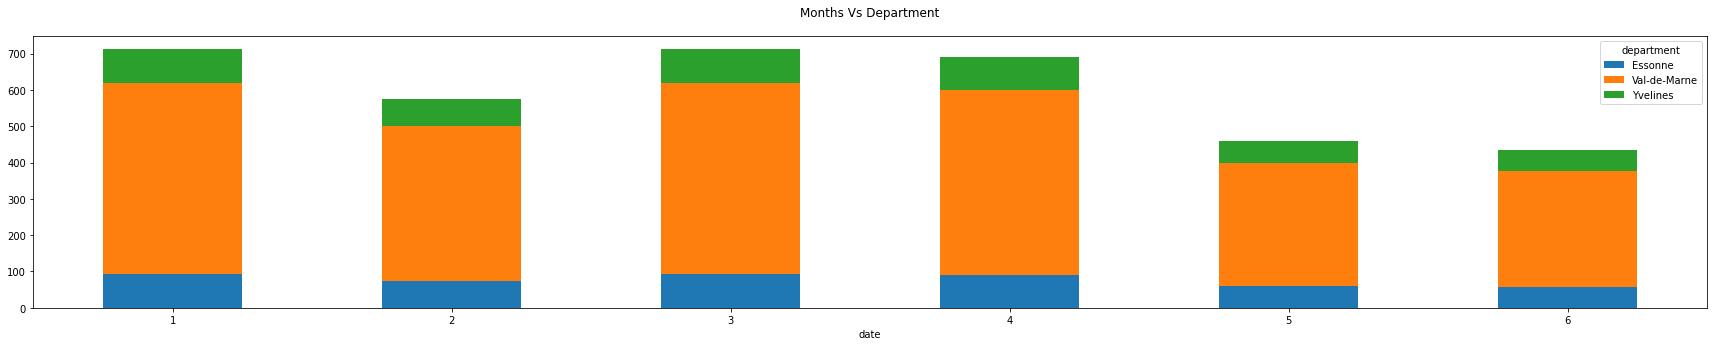

In [405]:
# Plot of months vs department
table = pd.crosstab(autolib.date.dt.month, autolib.department)
table.plot.bar(stacked = True, figsize = (30,5))
plt.title('Months Vs Department', y = 1.05, fontsize = 12)
plt.xticks(rotation = 0)


Val-de-Marne had the highest frequency for all 6 months.

#### ii) Numerical-Numerical Analysis

In [332]:
# Numerical-numerical plots
def LineScatterPlots(x, y1, y2, data):
  fig, ax = plt.subplots(2,2, figsize = (12, 17))
  # Cars taken
  sns.scatterplot(data[x], data[y1], ax = ax[0,0], color = 'green')
  ax[0,0].set_title(f'Scatter Plot: {x} - {y1}', y = 1.05)
  sns.lineplot(data[x], data[y1], ax = ax[0,1], color = 'purple')
  ax[0,1].set_title(f'Line Plot: {x} - {y1}', y = 1.05)

  # Cars returned
  sns.scatterplot(data[x], data[y2], ax = ax[1,0], color = 'green')
  ax[1,0].set_title(f'Scatter Plot: {x} - {y2}', y = 1.05)
  sns.lineplot(data[x], data[y2], ax = ax[1,1], color = 'purple')
  ax[1,1].set_title(f'Line Plot: {x} - {y2}', y = 1.05)
  plt.show()

In [333]:
# Numerical-numerical plots
def LineScatterPlots2(x, y, data):
  fig, ax = plt.subplots(1,2, figsize = (15, 5))
  sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data[x], data[y], ax = ax[1], color = 'purple')
  ax[1].set_title(f'Line Plot: {x} - {y}', y = 1.05)
  plt.show()

In [334]:
# Numerical columns
numerical

['n_daily_data_points',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

**Bluecars**

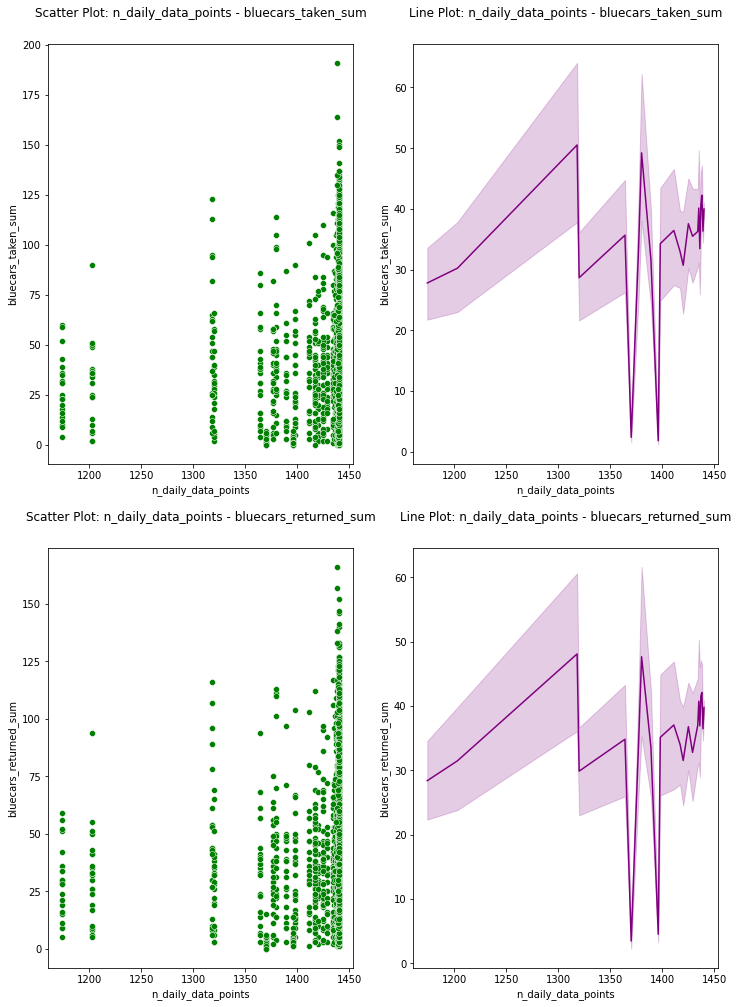

In [335]:
# Bluecars taken and returned vs data points
LineScatterPlots(numerical[0],numerical[1], numerical[2], autolib)

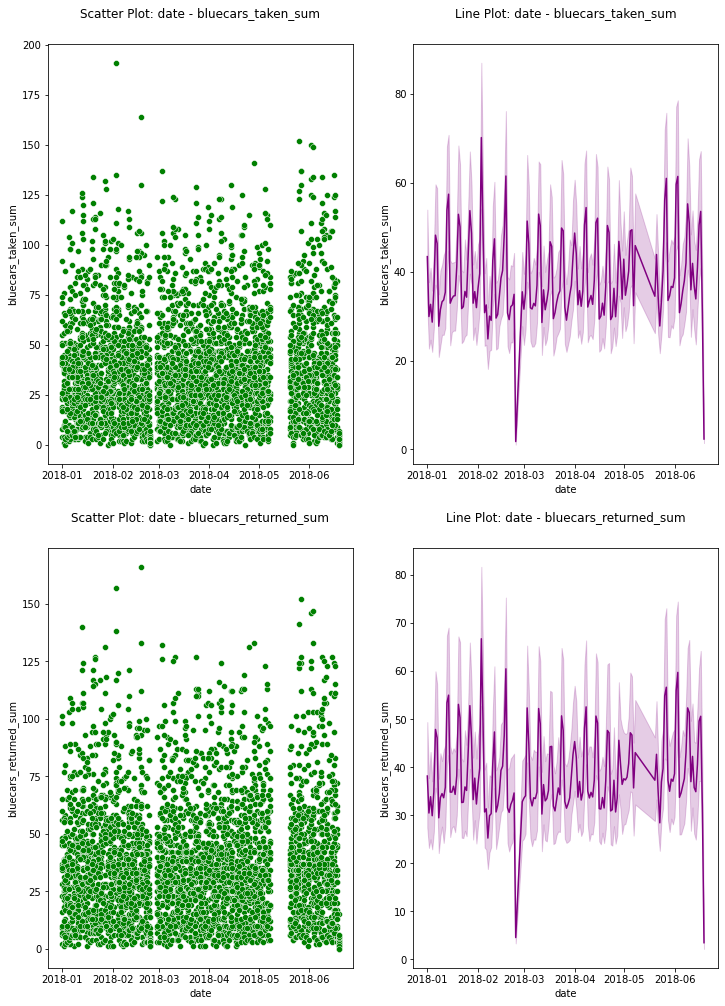

In [336]:
# Bluecars taken and returned vs date
LineScatterPlots('date',numerical[1], numerical[2], autolib)

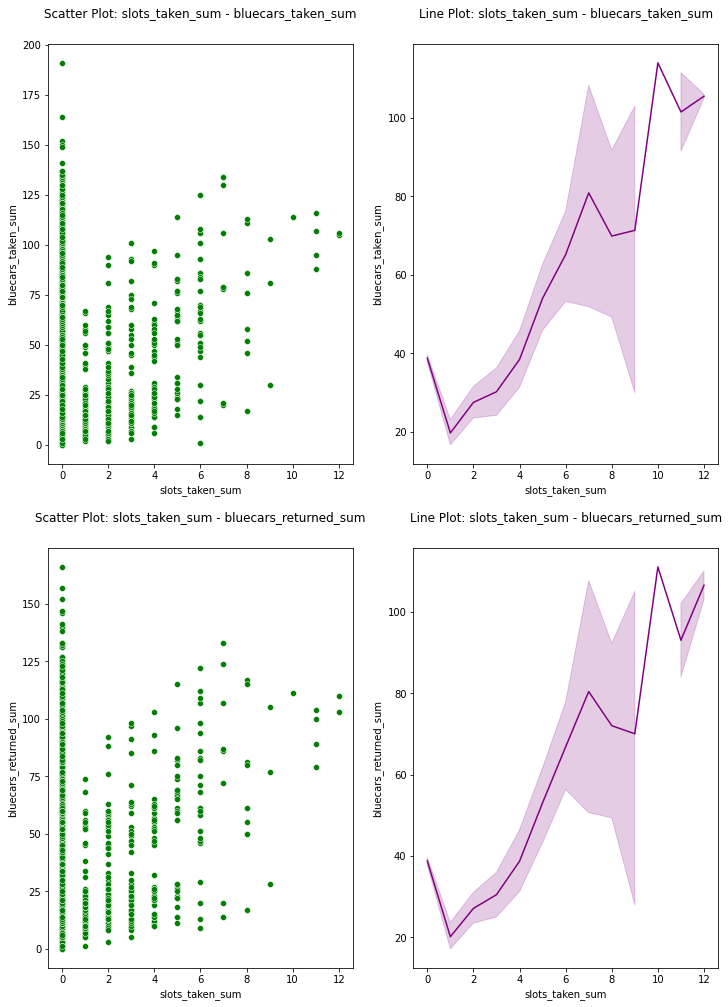

In [337]:
# Bluecars taken and returned vs slots taken
LineScatterPlots(numerical[-1],numerical[1], numerical[2], autolib)

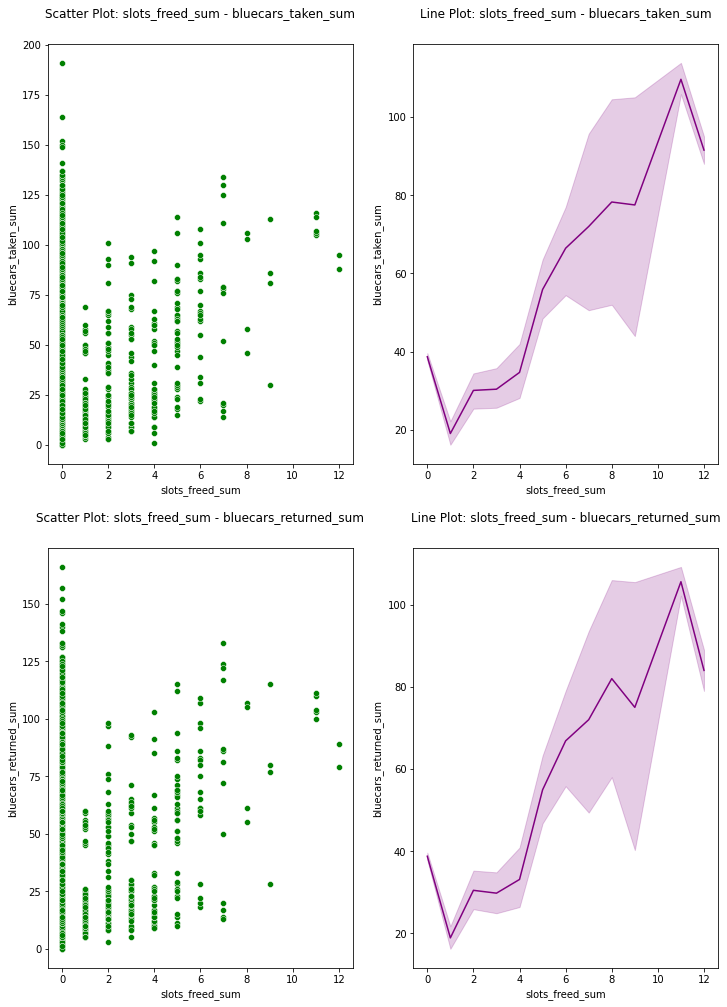

In [338]:
# Bluecars taken and returned vs slots freed
LineScatterPlots(numerical[-2],numerical[1], numerical[2], autolib)

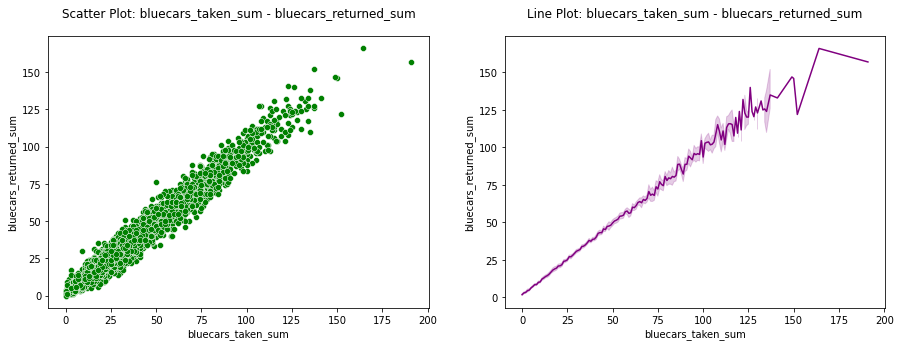

In [339]:
# Bluecars taken vs returned
LineScatterPlots2(numerical[1], numerical[2], autolib)

**Utilib**

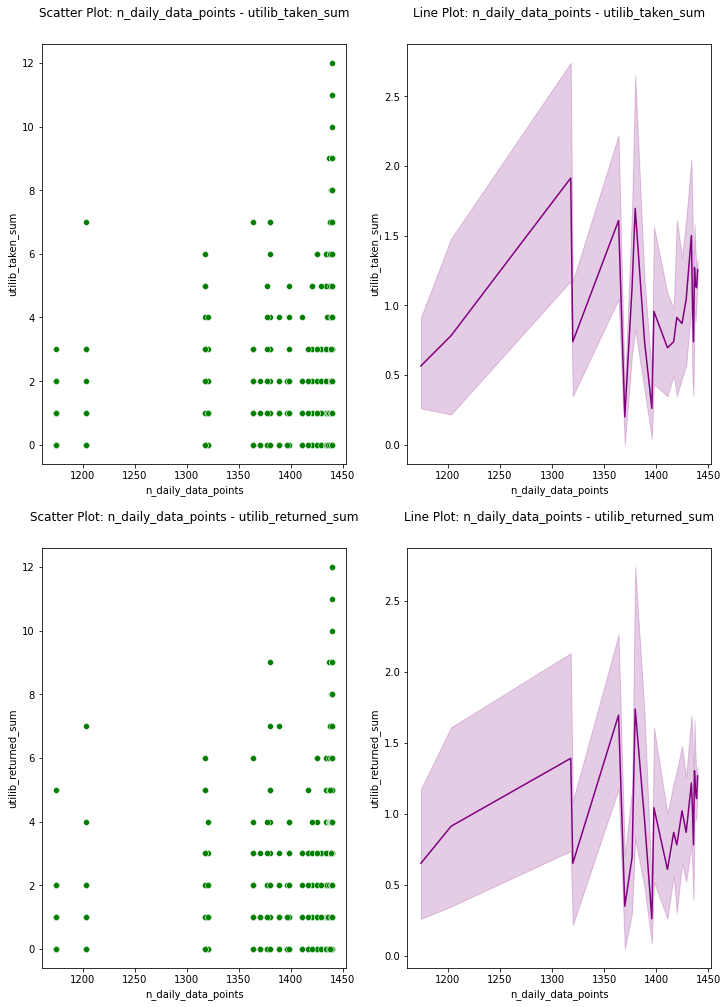

In [340]:
# Utilib cars taken and returned vs data points
LineScatterPlots(numerical[0],numerical[3], numerical[4], autolib)

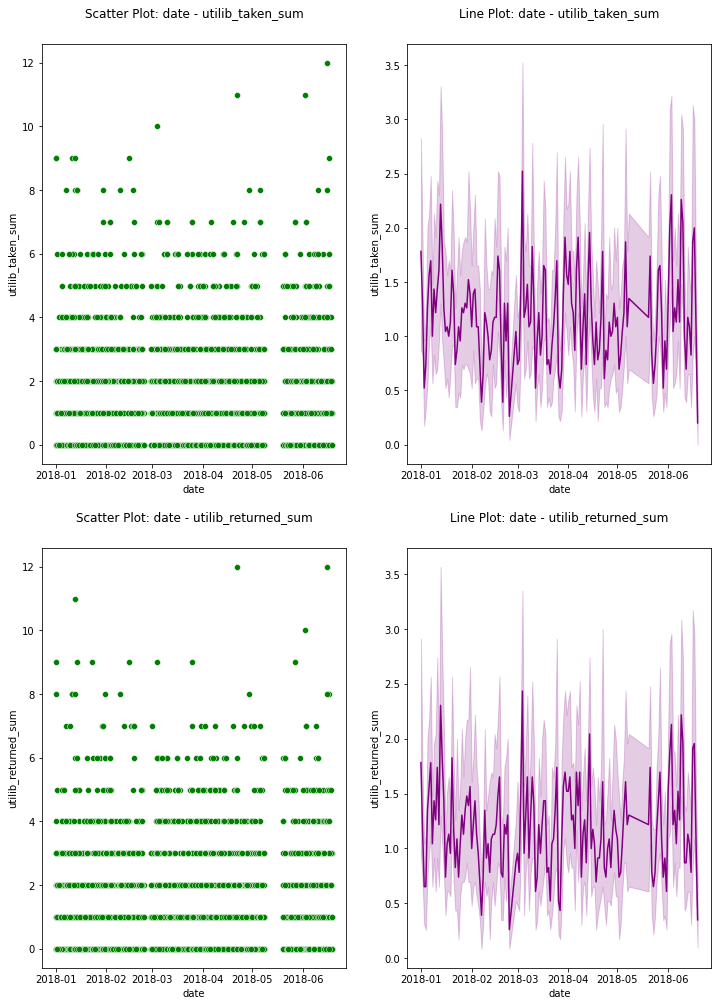

In [341]:
# Utilib cars taken and returned vs date
LineScatterPlots('date',numerical[3], numerical[4], autolib)

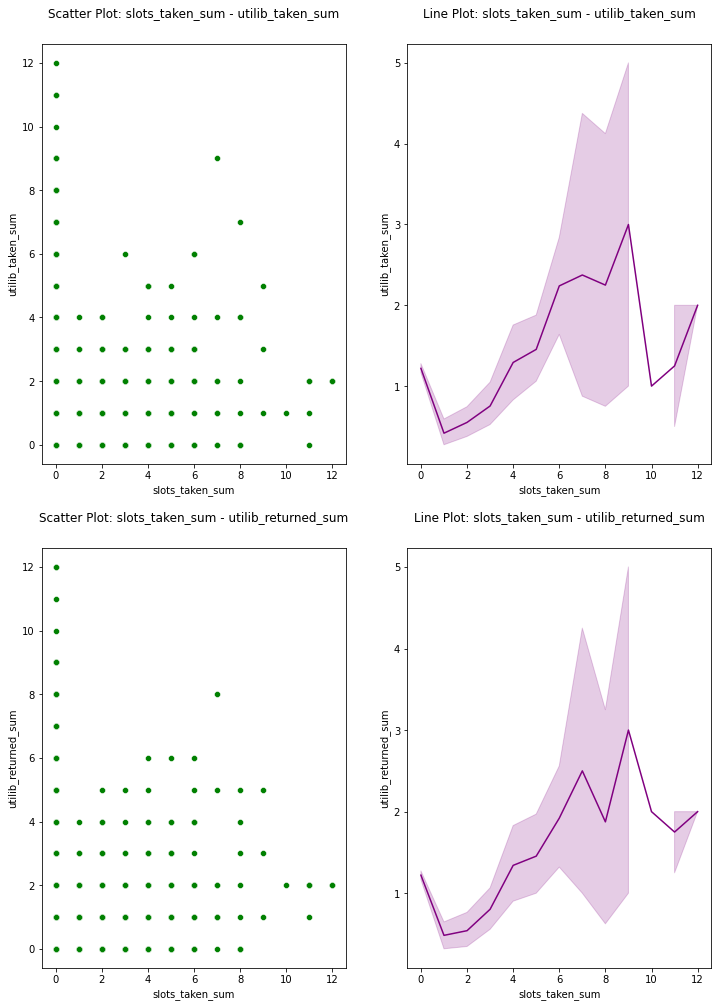

In [342]:
# Utilib cars taken and returned vs slots taken
LineScatterPlots(numerical[-1],numerical[3], numerical[4], autolib)

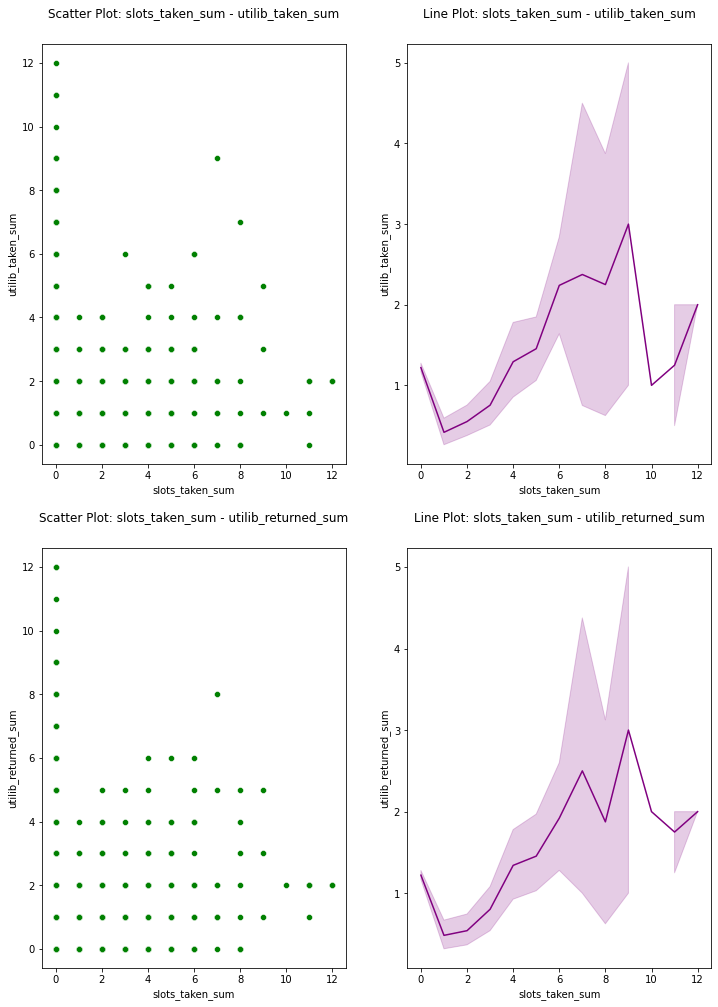

In [343]:
# Utilib cars taken and returned vs slots freed
LineScatterPlots(numerical[-1],numerical[3], numerical[4], autolib)

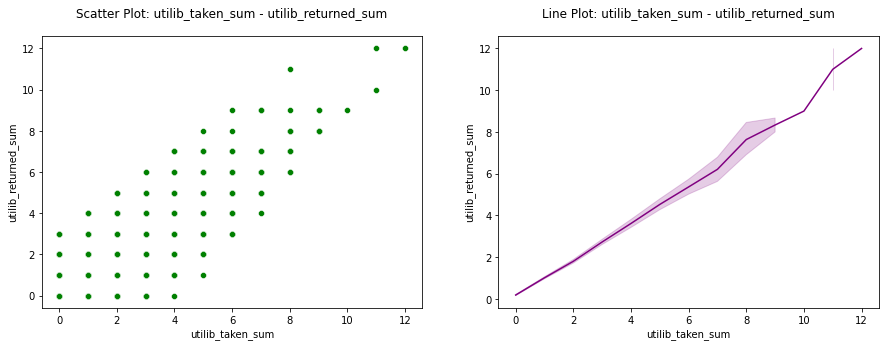

In [344]:
# Utilib cars taken vs returned
LineScatterPlots2(numerical[3], numerical[4], autolib)

**Utilib-14**

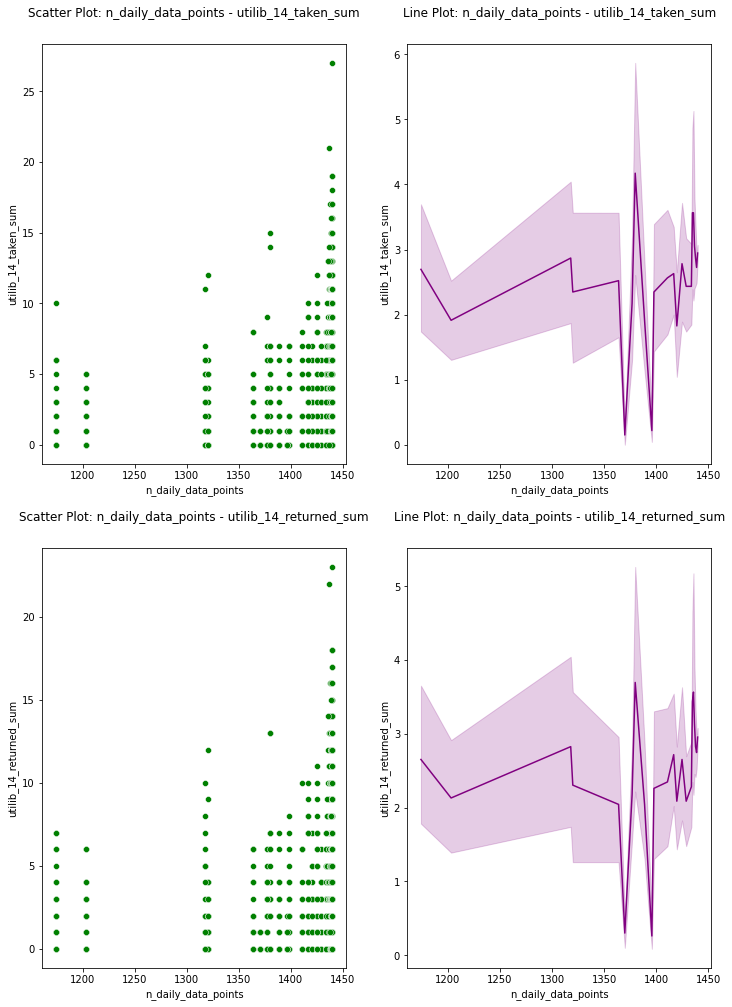

In [345]:
# Utilib-14 taken and returned vs data points
LineScatterPlots(numerical[0],numerical[-4], numerical[-3], autolib)

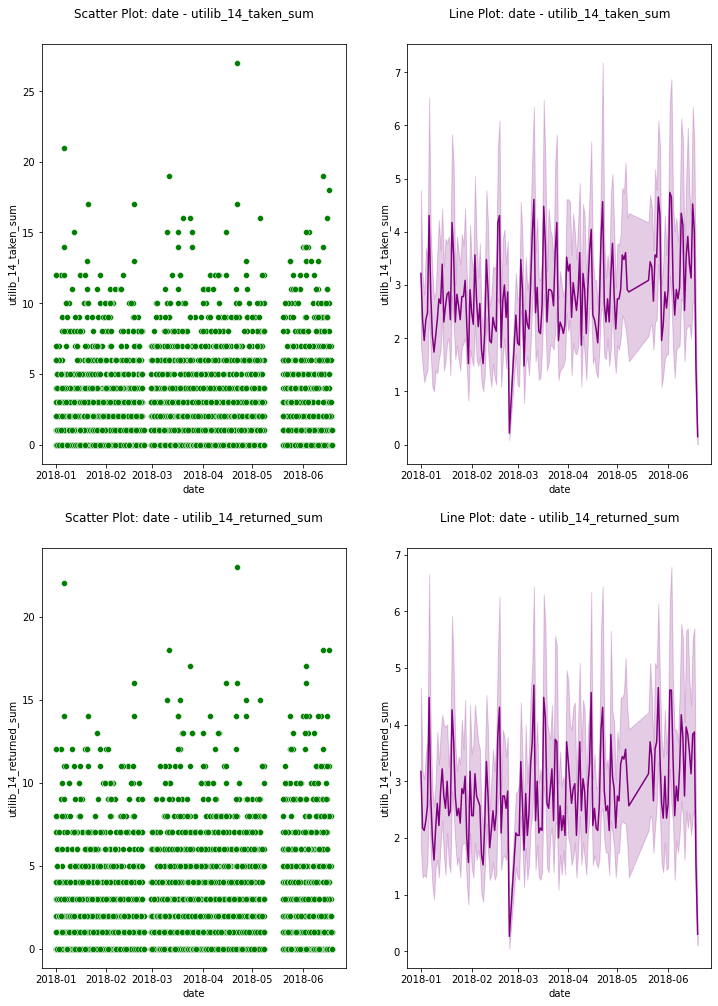

In [346]:
# Utilib-14 cars taken and returned vs date
LineScatterPlots('date',numerical[-4], numerical[-3], autolib)

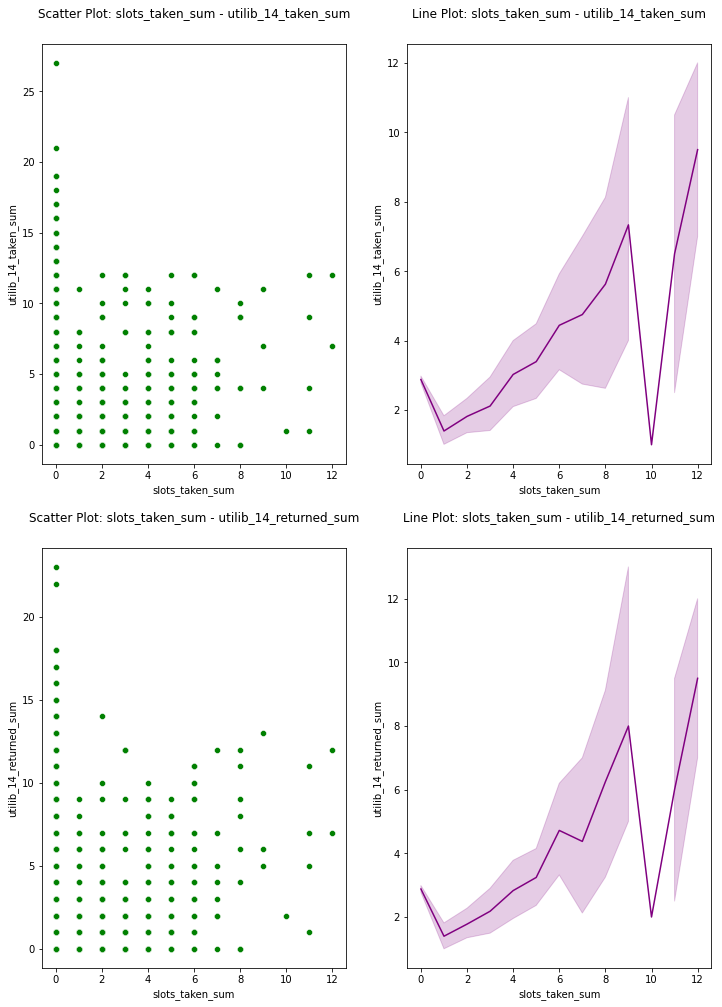

In [347]:
# Utilib-14 cars taken and returned vs slots taken
LineScatterPlots(numerical[-1],numerical[-4], numerical[-3], autolib)

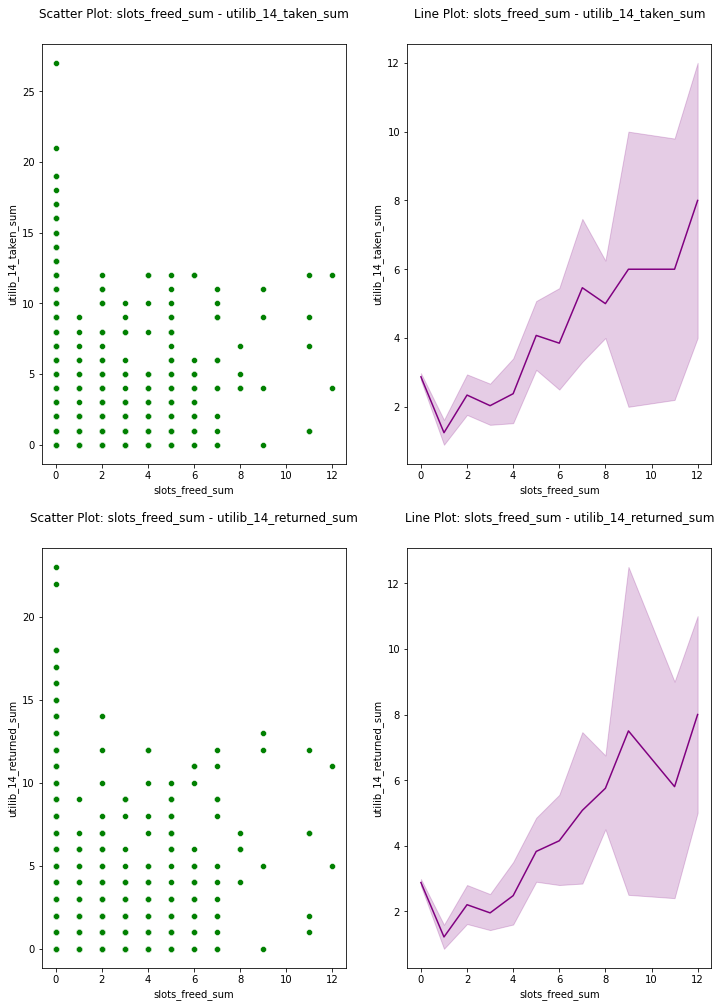

In [348]:
# Utilib-14 cars taken and returned vs slots freed
LineScatterPlots(numerical[-2],numerical[-4], numerical[-3], autolib)

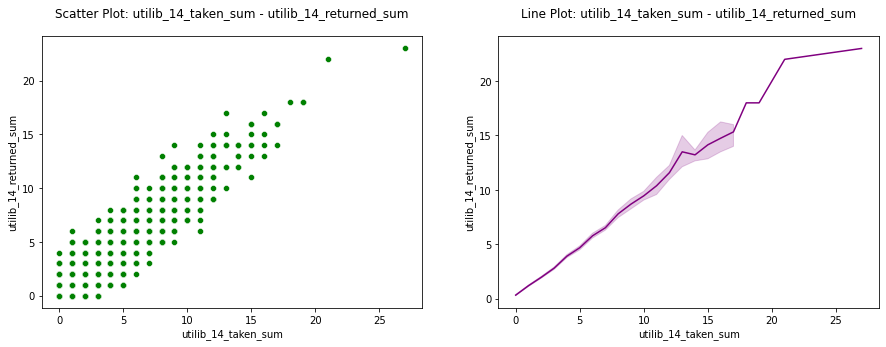

In [349]:
# Utilib-14 cars taken vs returned
LineScatterPlots2(numerical[-4], numerical[-3], autolib)

**Correlation Matrix**

In [350]:
# Correlation matrix
autolib.corr()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000433,0.000230,0.056456,0.058796,0.044332,0.043333,0.080223,0.079357,0.091660,0.092318
n_daily_data_points,0.000433,1.000000,0.000838,0.067836,0.064472,0.043482,0.045936,0.044992,0.047075,0.013114,0.012304
dayofweek,0.000230,0.000838,1.000000,0.242651,0.214412,0.137233,0.124460,0.153298,0.132553,0.055870,0.039422
bluecars_taken_sum,0.056456,0.067836,0.242651,1.000000,0.979848,0.492971,0.489540,0.615232,0.607193,0.108663,0.102632
bluecars_returned_sum,0.058796,0.064472,0.214412,0.979848,1.000000,0.498450,0.493829,0.618672,0.611526,0.103040,0.103208
utilib_taken_sum,0.044332,0.043482,0.137233,0.492971,0.498450,1.000000,0.874796,0.348499,0.335369,0.022674,0.021665
utilib_returned_sum,0.043333,0.045936,0.124460,0.489540,0.493829,0.874796,1.000000,0.346570,0.331842,0.020096,0.019664
utilib_14_taken_sum,0.080223,0.044992,0.153298,0.615232,0.618672,0.348499,0.346570,1.000000,0.924807,0.049850,0.048735
utilib_14_returned_sum,0.079357,0.047075,0.132553,0.607193,0.611526,0.335369,0.331842,0.924807,1.000000,0.049518,0.050161
slots_freed_sum,0.091660,0.013114,0.055870,0.108663,0.103040,0.022674,0.020096,0.049850,0.049518,1.000000,0.977748


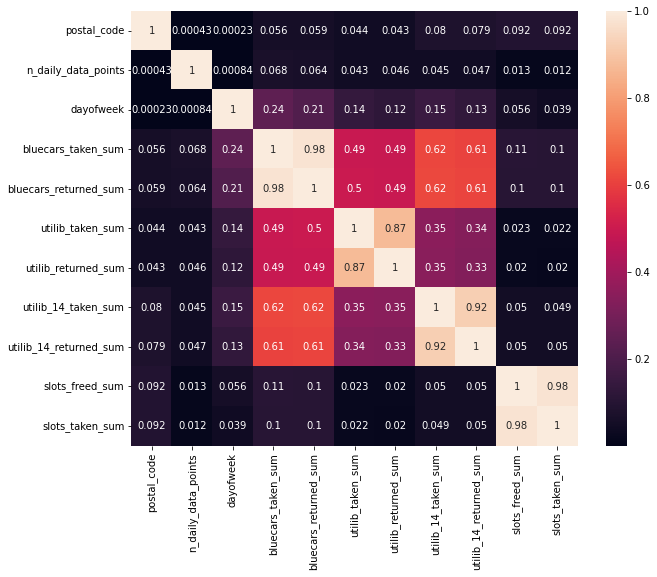

In [351]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(autolib.corr(), annot = True)

#### iii) Numerical-Categorical

In [352]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(data[x], data[y], palette = 'flare')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

In [353]:
nominal

['postal_code', 'day_type']

The taken and return columns are similar, therefore, the taken column will be used for the following analysis.

**Bluecar**

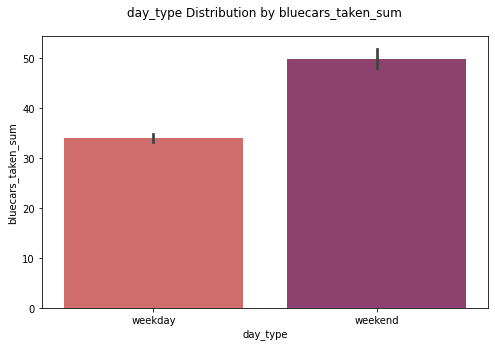

In [354]:
# Bluecar taken ns day_type
BarPlotBiv(nominal[-1], numerical[1], autolib)

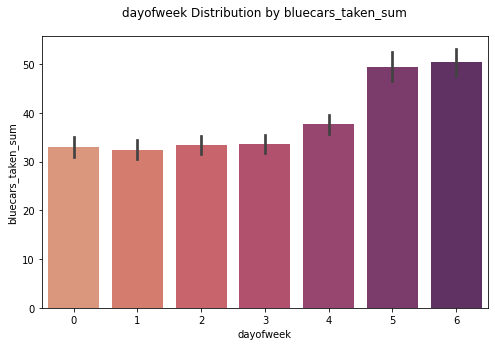

In [355]:
# Bluecar taken vs day of week
BarPlotBiv(ordinal[0], numerical[1], autolib)

In [358]:
# Department frequrncy 
autolib['department'].value_counts()

Val-de-Marne    2650
Yvelines         468
Essonne          467
Name: department, dtype: int64

**Assumptions**

**H0**: Yvelines and Essone have the same mean of Bluecars taken daily.

**H1**: Yvelines and Essone do not have the same mean of Bluecars taken daily.

**Acceptance Criteria**

* Alpha level = 0.05
* Beta level = 

In [359]:
# Sample columns
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'department'],
      dtype='object')

In [379]:
# Sum of bluecars taken
yvelines = autolib_no_outliers[autolib_no_outliers['department'] == 'Yvelines']['bluecars_taken_sum']
essonne = autolib_no_outliers[autolib_no_outliers['department'] == 'Essonne']['bluecars_taken_sum']


**Deciding the statistical test to be implemented**

**1. Parametric**

**Independent Z-Test**

Conditions:
* The sample size is greater than 30. 
* Data points should be independent from each other. 
* Normal distribution of data.
* Random selection of data.
* Equal sample sizes.

a) The samples were independently drawn.

In [406]:
# Ensuring that the samples have equal lengths to prevent a broadcast error and 
# to satisfy the Z-test conditions.
print(f'yvelines: {len(yvelines)}')
print(f'essonne: {len(essonne)}')

yvelines: 379
essonne: 285


In [407]:
# Selecting the first 285 records in yvelines
yvelines_short = yvelines.iloc[range(285)]

In [408]:
# Normality test
# Visual test function
def NormalityTest(data1, data2, column): 
  # Residuals 
  diff = data1.values - data2.values  

  # Probalility plot 
  stats.probplot(diff, plot= plt)
  plt.title(f'{column} P-P Plot') 
  plt.show()

  # Histogram 
  diff = pd.Series(diff)
  title = f'{column} Residuals'
  diff.plot(kind= "hist", title= title)
  plt.xlabel(column) 
  plt.show()

  # Shapiro Normality Test
  test_statistic, p_value = stats.shapiro(diff)
  print(f"Test statistic = {test_statistic}")
  print(f"P-Value = {p_value}")

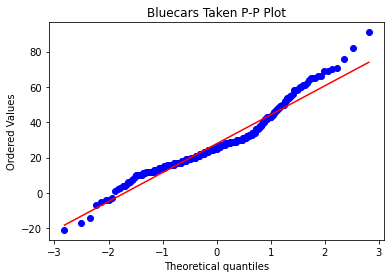

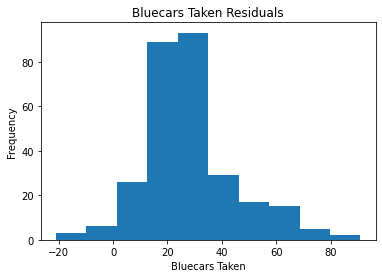

Test statistic = 0.9493376016616821
P-Value = 2.3270768423344634e-08


In [409]:
# Function call
NormalityTest(yvelines_short, essonne, 'Bluecars Taken')

b) The normality test is significant as the Shapiro-Wilk test p-value < 0.05. Therefore, there is sufficient evidence to reject the null hypothesis of a normal distribution.

The parametric tests cannot be applied as the data is positively skewed. Therefore, non-parametric tests will be applied.

**Non-Parametric Tests**

In [390]:
# Dependent variable
autolib['bluecars_taken_sum'].unique()

array([ 71,  24,  43,  31,  35,  68,  67,  20,  28,  64,  70,  25,  33,
        37,  55,  80,  63,  29,  40,  46,  45,  62,  34,  32,  81,  51,
        59,  26,  39,  38,  48,  85,  19,  41,   2,  52,  36,  74,  75,
        66,  30,  78,  47,  56,  27,  44,  58,  65,  93,  88,  57,  50,
        49,  53,  69,  72,  54,  82,  76,   4,  23,  22,   9,  17,   0,
        21,  42,   1,  16,  97,  60,  84,  83,  12,  10,  11,   5,   6,
         3,  13,  18,   7,   8,  14,  15,  92,  87, 104,  98, 117, 124,
       115, 102, 134, 108, 116,  90, 105, 132,  94, 103, 191, 101, 100,
        79, 109, 106, 164,  95, 137,  91, 123,  89,  96, 129,  99, 119,
       112,  86, 113, 130, 125, 141, 128, 110, 152, 133, 111, 107, 135,
        73,  61,  77, 114, 120, 121, 122, 127, 150, 149, 126, 118])

**Mann Whitney U Test**

Conditions:
* The dependent variable should be measured on an ordinal scale or a continuous scale.
* The independent variable should be two independent, categorical groups.
* Observations should be independent. 
* Observations are not normally distributed. However, they should follow the same shape (i.e. both are bell-shaped and skewed left).

In [389]:
stats.mannwhitneyu(yvelines, essonne)

MannwhitneyuResult(statistic=2610.5, pvalue=2.4244998427152828e-98)

**Mood's Median Test**

* Data should include only one categorical factor.
* The dependent variable is continuous or discrete-count, and the independent variables are discrete with two or more attributes.
* Sample data need not be normally distributed.
* Sample sizes can be unequal too.

In [388]:
# Mood median test of the two samples.
test_statistic, p_value, grand_median, cont_table = stats.median_test(yvelines, essonne)
print(f'test_statistic = {test_statistic}\np_value = {p_value}\ngrand_median = {grand_median}\ncont_table = \n{cont_table}')

test_statistic = 402.86908299773177
p_value = 1.3073048092955167e-89
grand_median = 26.5
cont_table = 
[[318  14]
 [ 61 271]]


**Point Estimate**

In [412]:
autolib_population.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum', 'Department'],
      dtype='object')

In [425]:
# Point estimate for the sum of bluecars taken
population = autolib_population[(autolib_population['Department'] == 'Yvelines')
 | (autolib_population['Department'] == 'Essonnes') | (autolib_population['Department'] == 'Val-de-Marne')]
mean = population['BlueCars_taken_sum'].mean() - autolib.bluecars_taken_sum.mean()
median = population['BlueCars_taken_sum'].median() - autolib.bluecars_taken_sum.median()

print(f'Mean = {mean}')
print(f'Median = {median}')

Mean = 4.052881142741612
Median = 3.0


In [428]:
# Population and sample mean
population['BlueCars_taken_sum'].mean()
autolib.bluecars_taken_sum.mean()

38.47726638772664

**Confidence Interval**

The data is skewed therefore the calculation cannot employ the functions used to calculate the confidence interval for normal distributions.